# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.



In [1]:
import numpy as np
import pandas as pd
import os 
import requests
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly_express as ps
import plotly.graph_objects as go

In [2]:
os.getcwd()

'c:\\Users\\david\\OneDrive\\Documentos\\VScode\\samplerepo\\1_Modulo_1\\13_Trabajo_Modulo_1\\Trabajo_Titanic'

In [3]:
if not os.getcwd().split('\\')[-1]=='Trabajo_Titanic': os.chdir('..')
os.chdir('datos/')
data = pd.read_csv(os.path.join(os.getcwd(), 'titanic.csv'))
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
df = pd.DataFrame(data=data)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

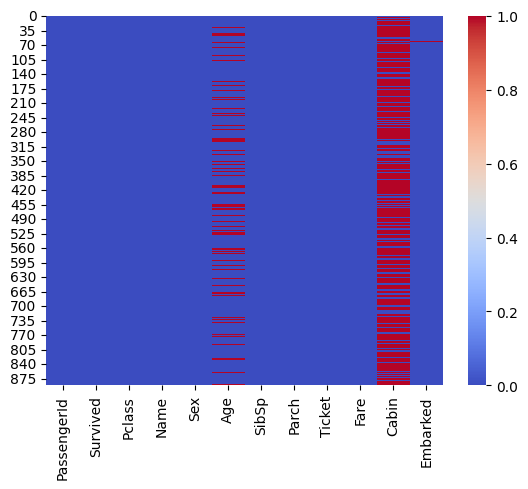

In [7]:
nulos0 = df.isnull()
grafica = sns.heatmap(nulos0,cmap='coolwarm')
grafica

<Axes: >

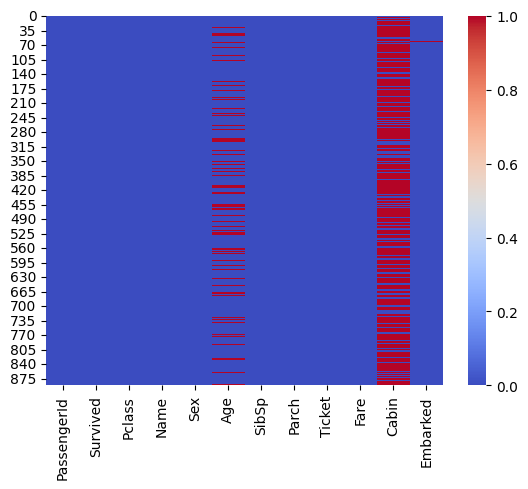

In [8]:
sns.heatmap(df.isnull(),cmap='coolwarm')

In [9]:
df = df.drop(['Cabin'], axis=1)

In [10]:
df['Age'].fillna(value=df['Age'].mean(),inplace=True)

In [11]:
df['Age'] = df['Age'].astype(int)

In [12]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [14]:
df.replace({'Embarked': {'S':'Southampton','C':'Cherburgo','Q':'Queenstown'}},  inplace=True)

In [15]:
df['Fare'] = df['Fare'].round()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.0,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.0,Cherburgo
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8.0,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.0,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.0,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0,Cherburgo


In [16]:
rangos= [-1,10,20,30,40,50,60,70,80]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
df['AgeRange'] = pd.cut(df['Age'], bins=rangos, labels=labels)

In [17]:
rangos1 = [-1,1,60,120,180,240,300,540]
labels1 = ['0-0','1-60','60-120','120-180','180-240','240-300','300-540']
df['FareRange'] = pd.cut(df['Fare'], bins=rangos1, labels=labels1)

In [26]:
Filtro_clase1= df.loc[df['Pclass']<=1]
Tickets1= Filtro_clase1[['PassengerId','Name', 'Ticket','Fare','Age']].groupby(['PassengerId','Ticket','Fare','Name','Age']).count().sort_values('Fare', ascending=False)
Tickets1

,,,,
PassengerId,Ticket,Fare,Name,Age
259,PC 17755,512.0,"Ward, Miss. Anna",35
738,PC 17755,512.0,"Lesurer, Mr. Gustave J",35
680,PC 17755,512.0,"Cardeza, Mr. Thomas Drake Martinez",36
89,19950,263.0,"Fortune, Miss. Mabel Helen",23
28,19950,263.0,"Fortune, Mr. Charles Alexander",19
...,...,...,...,...
816,112058,0.0,"Fry, Mr. Richard",29
807,112050,0.0,"Andrews, Mr. Thomas Jr",39
634,112052,0.0,"Parr, Mr. William Henry Marsh",29


In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.0,Southampton,20-30,1-60
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.0,Cherburgo,30-40,60-120
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8.0,Southampton,20-30,1-60
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.0,Southampton,30-40,1-60
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0,Southampton,30-40,1-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0,Southampton,20-30,1-60
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0,Southampton,10-20,1-60
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.0,Southampton,20-30,1-60
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0,Cherburgo,20-30,1-60


In [20]:
print('\nLa persona de menor edad en el barco tenia:\n{}'.format(df['Age'].min()))
print('\nLa persona de mayor edad en el barco tenia:\n{}'.format(df['Age'].max()))
print('\nLa edad mediana en el barco era:\n{}'.format(df['Age'].median()))
print('\nEl precio más bajo pagado para subir al barco fue:\n{}'.format(df['Fare'].min()))
print('\nEl precio más alto pagado para subir al barco fue:\n{}'.format(df['Fare'].max()))
print('\nEl de personas embacadas en Southampton:\n{}'.format(df['Embarked'][df['Embarked']== 'S'].count()))
print('\nEl de personas embacadas en Cherburgo:\n{}'.format(df['Embarked'][df['Embarked']== 'C'].count()))
print('\nEl de personas embacadas en Queenstown:\n{}'.format(df['Embarked'][df['Embarked']== 'Q'].count()))


La persona de menor edad en el barco tenia:
0

La persona de mayor edad en el barco tenia:
80

La edad mediana en el barco era:
29.0

El precio más bajo pagado para subir al barco fue:
0.0

El precio más alto pagado para subir al barco fue:
512.0

El de personas embacadas en Southampton:
0

El de personas embacadas en Cherburgo:
0

El de personas embacadas en Queenstown:
0


In [21]:
print('\nEl de número personas supervivientes:\n{}'.format(df[df['Survived'] == 1]['Survived'].sum()))
print('\nEl de número personas supervivientes embacados en Southampton:\n{}'.format(df[(df['Embarked']== 'Southampton')&(df['Survived'] == 1)]['Survived'].sum()))
print('\nEl de número personas supervivientes embacados en Cherburgo:\n{}'.format(df[(df['Embarked']== 'Cherburgo')&(df['Survived'] == 1)]['Survived'].sum()))
print('\nEl de número personas supervivientes embacados en Queenstown:\n{}'.format(df[(df['Embarked']== 'Queenstown')&(df['Survived'] == 1)]['Survived'].sum()))


El de número personas supervivientes:
342

El de número personas supervivientes embacados en Southampton:
219

El de número personas supervivientes embacados en Cherburgo:
93

El de número personas supervivientes embacados en Queenstown:
30


In [22]:
distSurv = df[(df['Survived'] == 1)][['Embarked']].value_counts()
distSurv

Embarked   
Southampton    219
Cherburgo       93
Queenstown      30
dtype: int64

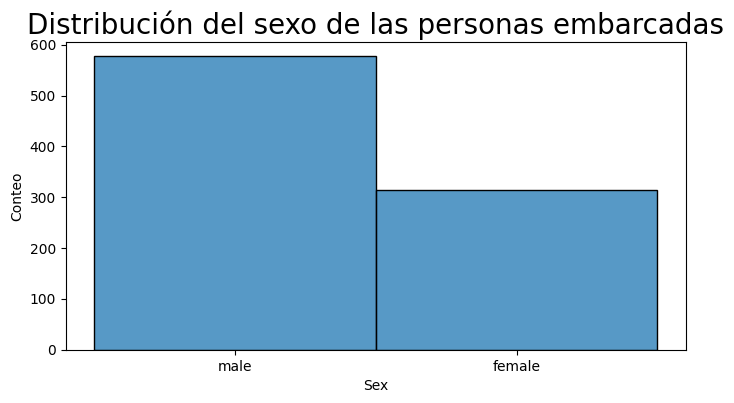

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Sex'])
plt.title('Distribución del sexo de las personas embarcadas', size=20)
plt.ylabel('Conteo');

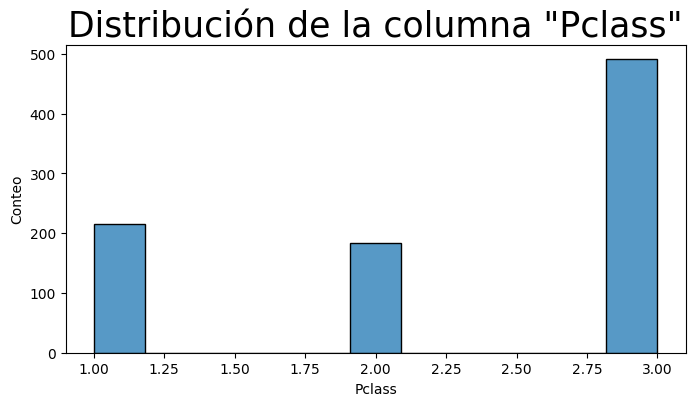

In [24]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Pclass'])
plt.title('Distribución de la columna "Pclass"', size=25)
plt.ylabel('Conteo');

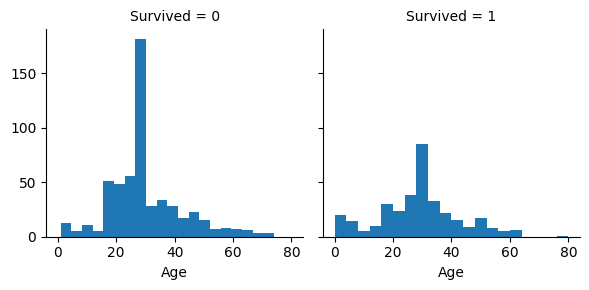

In [25]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [26]:
df.to_csv('TitanicPro.csv', index=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.0,Southampton,20-30,1-60
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.0,Cherburgo,30-40,60-120
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8.0,Southampton,20-30,1-60
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.0,Southampton,30-40,1-60
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0,Southampton,30-40,1-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0,Southampton,20-30,1-60
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0,Southampton,10-20,1-60
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.0,Southampton,20-30,1-60
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0,Cherburgo,20-30,1-60


In [ ]:
# Asegúrate de que no haya valores nulos en el DataFrame

df1 = df[['SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']].dropna()

# Calcular Q1, Q3 y luego IQR

Q1 = df1.quantile(0.25)

Q3 = df1.quantile(0.75)

IQR = Q3 - Q1

#límites para los outliers

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

#los identificamos

outliers = (df1 < lower_bound) | (df1 > upper_bound)

#eliminamos

df1_no_outliers = df1[~outliers.any(axis=1)]

def outliers_iqr (xs):

    q1,q3 = np.percentile(xs,[25,75])

    iqr = q3-q1

    lower_bound = q1-(iqr*1.5)

    upper_bound = q3+(iqr*1.5)

    return np.where((xs>upper_bound)|(xs<lower_bound))

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

df = dataframe principal

df1 = df.copy ( variacion 1 )

df2 = df1.copy ( variacion 2 )

df2 = df.copy()

#reemplazamos los outliers con el valor más cercano disponible

def reemplazamos_outliers (df2):
    return df2.mask(outliers, df2.interpolate(method='linear'), axis=1)

reemplazamos_outliers(df2)

df2

df1= df[['SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']]

df1 = df1.dropna()


from scipy.stats import zscore

df1_zscore = df1.apply(zscore)

print(df1_zscore.head())


import glob

df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "PRSA*.csv"))))


